# 挑战任务七：区分三类植物细胞

## 1. 题目概述

- 目标：训练一个小型图像分类模型，让计算机根据显微镜下的叶片细胞图像，判断每张图片属于哪一类细胞。三个类别分别是：

    - Epidermis Cell（表皮细胞）

    - Dermal Tissue Cell（保护组织细胞）
 
    - Meristematic Tissue Cell（分生组织细胞）

<div style="text-align: center;">
  <div style="flex: 1;">
    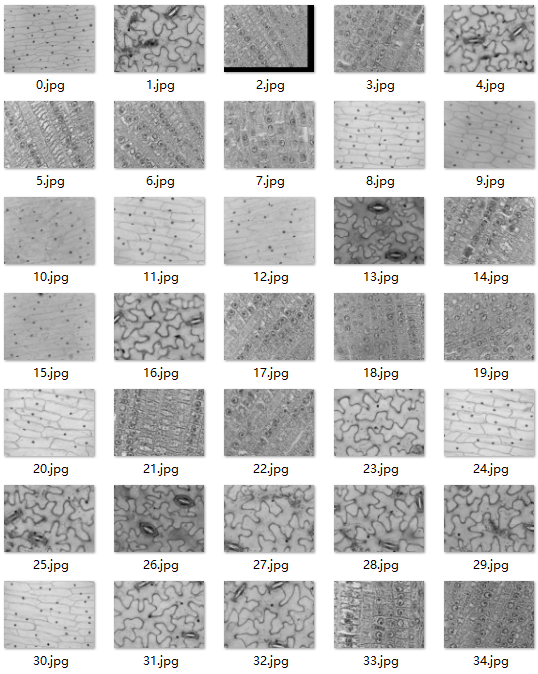
    <h5>图片1：三类细胞图片</h5>
  </div>
</div>

- 时长与设备要求：仅使用 CPU 训练 + 测试的总时长不超过 10 分钟。

- 评测指标：评分标准为所有类别的F1-Score的平均值。

## 2. 数据集介绍

本任务所用数据集包含训练集和测试集。

* 训练集包含两个部分：

    * data/train/image_train：包含900张jpg格式的显微镜下植物细胞图片，每张图片均有唯一编号，大小为400×300。

    * data/train/label_train.csv：训练集的标签，其中第一列为"file_id"，为自然数，表示存储图片的编号；第二列为"label"，取值为0,1,2，对应三类细胞的类别。

    * *注意：训练集中的“0、1、2”分别和哪一类植物细胞对应需要我们自己手动识别。*


* 测试集包含两个部分：

    * data/test/image_test：包含600张jpg格式的显微镜下植物细胞图片，每张图片均有唯一编号，大小为80×60。

    * data/test/label_test_nolabel.csv：只包含一列"file_id"，为自然数，表示存储图片的编号。

    * *注意：训练图像原始分辨率为400×300，测试集为80×60。*

## 3. 打榜需知

* 提交文件名：submission.csv + Cell_classification.jypnb

* 文件内容：文件包含两列，第一列为“file_id”，即测试图片编号；第二列为“label”，是每张图片对应的细胞类别。

* 提交地址：玻尔平台

## 4. 核心任务

本任务和前面的**任务六**类似，都是一个基于深度学习的图像识别任务。我们将搭建并训练一个卷积神经网络（CNN），学习三种植物细胞图片的特征，并实现对测试集中 600 张显微镜植物细胞图像的准确分类。以下是我们的主要任务内容：

1. **环境工具的配置**

在开始训练模型前，我们需要先在电脑上准备好运行环境，并整理好数据文件。要清楚图片和数据表格分别放在哪里，表格中哪一列是图片编号、哪一列是分类标签。只有文件结构、命名规则、读取方式都统一好，后续训练和测试才能顺利进行。

2. **数据加载与预处理**

在模型学习之前，我们需要把图片“整理成模型能理解的样子”。这包括：统一为灰度图、统一图片尺寸、转变成模型能计算的张量格式。我们还可以从`训练集`中划分出`验证集`，让模型既能学习，又能接受公平的测试。这些步骤能让训练更加高效、稳定，也让最终结果更可靠。

3. **搭建卷积神经网络**

搭建卷积神经网络是本任务的核心。它可以“观察”图像中的特征，比如形状、纹理等等。通过搭建合适的网络结构，我们的模型才能准确地识别出不同类型的细胞。

4. **模型训练与监测**

训练模型的过程，就像不断试错、逐渐改进的过程。每一轮训练中，我们会：

- 让模型根据训练数据进行预测，与真实答案对比；
- 根据误差调整模型参数，让预测越来越准；
- 关注两个关键指标：学习的速度是否合适、预测的准确率是否在提升。

只要我们在“效率”和“效果”之间找到平衡，就能在有限的时间内得到可靠的结果。

5. **模型预测与结果提交**

最后，我们就可以用模型来预测测试集中的图片。模型会把图片分类为0, 1或2这三个数字，我们再把数字标签对应到细胞的英文名称上。这样，模型就能自动识别显微镜下不同类型的植物细胞啦！

### 🌱 让我们一起开始任务吧！

### 子任务 1：环境工具的配置
  
#### 1.1 导入Python模块

本实验依赖的神经网络开发库均已预装。下面通过导入相关的 Python 模块，完成环境就绪，为后续的模型构建、训练与评估提供支持。

1. **深度学习工具**

* 导入PyTorch，其中：
  - `torch.nn`：用于搭建神经网络结构；
  - `torch.optim`：用于模型训练时的参数优化；
  - 从`torch.utils.data`中导入`Dataset`、`DataLoader`和`Subset`，帮助管理和批量加载数据；
  - 从`torchvision`导入`transforms`，用于图像预处理。

2. **绘图与进度显示**

  * 导入`matplotlib`（绘图工具）和`tqdm`（显示训练进度条）。

3. **数据与文件处理**

  * 导入`pandas`（表格数据处理），`numpy`（科学计算），`PIL`（图片读取和保存），`scikit-learn`（机器学习辅助工具），以及`os`（操作系统接口）和`csv`（CSV 文件读写）。

4. **计时工具**

  * 导入`time`模块，用于记录训练所用时间。

In [ ]:
# 1. 导入深度学习工具
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Subset, DataLoader, Dataset
from torchvision import transforms

# 2. 导入绘图与进度显示工具
import matplotlib.pyplot as plt
from tqdm import tqdm

# 3. 导入数据与文件处理工具
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import StratifiedShuffleSplit  # （可选）分层划分工具
import os
import csv

# 4. 导入计时工具
import time

# 全部导入成功
print("我已成功完成环境工具的配置！")

**任务小结**：我们完成了本次实验的“开场准备”，这是保证我们后面的代码能“跑起来”的关键。

### 子任务2：数据加载与预处理

这一环节的目标，是把“原始图片和标签”整理成模型能听懂、能稳定学习的统一格式。可以把它想象成：我们在给模型准备学习资料。只有先把资料按统一标准整理好，模型这个“学生”才能专心学习。

**我们需要完成的任务：**

* 读取图片与标签

  从 CSV 表格中读出“图片编号”和“类别标签”，并找到对应的图片文件。

* 统一图片格式

  把所有图片调整成相同的尺寸和灰度（或颜色方式），让模型输入的数据整齐一致。

* （可选）划分数据集

  按比例把数据分成两部分：

  * 训练集：模型用来学习；

  * 验证集：用来检验模型是否真的学会。

* 批量加载数据

  使用`DataLoader`（数据装载器）把整理好的图片一小批一小批地传入模型中训练。这样做能加快速度，也更节省计算资源。

>**小贴士**💡：“预处理”并不是改变图片的内容，而是帮模型更容易“看清”它们。


#### 2.1 定义自己的数据集类

在学习过程中，我们希望模型学会识别三种细胞的特征。为此，首先要让模型“认识”每一类细胞长什么样。我们会读取图片及其对应的标签信息，这些标签保存在一个 CSV 文件中。程序读入该文件后，就能根据编号找到相应的图片，并知道每张图片所属的细胞类别。

**代码说明**
* `Dataset`（数据集类）是 PyTorch 提供的一个模板。定义一个数据集类，让我们可以根据任务需求自己定义数据加载逻辑，它规定了两个“必要”的方法：

  * `len`：告诉模型这份数据里一共有多少张图片；
  * `getitem`：告诉模型如何根据编号（index）取出第几张图片和它的标签。

In [ ]:
class MyDataset(Dataset):   # 自定义数据集类，继承PyTorch的Dataset 
    # init读取图像目录与标签文件
    def __init__(self, img_dir, label_file, transform=None):
        self.img_dir = img_dir                    # 保存图像所在的文件夹路径
        self.label_df = pd.read_csv(label_file)   #读取.csv中的图片编号和对应标签
        self.transform = transform                #图片预处理

    # len返回样本数
    def __len__(self):
        return len(self.label_df)

    # getitem 按索引取一张图片和对应标签
    def __getitem__(self, idx):
        
        #1. 读取图片
        img_name = f"{self.label_df.iloc[idx, 0]}.jpg"
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path)
       
        #2. 读取标签
        label = self.label_df.iloc[idx, 1]

        #3. 图片预处理
        if self.transform:
            image = self.transform(image)
            
        #4. 返回
        return image, label

#### 2.2 定义图片预处理方式

由于训练集和测试集的图片分辨率不一致，为了提高训练速度并适应 CPU 运行环境，我们需要先对训练集的图片进行预处理。

**代码说明**

* 我们使用`transform`定义预处理规则，将原始图片按统一格式进行转换。例如：
依次执行“转为灰度图 → 调整大小 → 转换为张量”等操作。

经过统一处理后，图片的尺寸与格式保持一致，模型就能更高效、更稳定地学习。

In [ ]:
# 动手练习1：在下方编写代码，根据需求定义transform的处理规则
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 转为单通道灰度（1 通道）
    
    # ✏️【请编写代码】补全代码，作用：将训练集的图像尺寸调整到与测试集相同。
    transforms.Resize(),
    transforms.ToTensor(),   # 将图片再转为 Tensor，像素值会缩放到 [0,1]
])

**注意与提示**：使用`Resize`时，括号中前一个数表示图像的高度，后一个数表示宽度，即（Height, Width）的顺序。

#### *选做项目：划分训练集/验证集

**代码说明**

* 我们使用 StratifiedShuffleSplit（分层随机划分）来完成这个过程。
* “分层”意味着在划分数据时，会让三种细胞的比例在训练集和验证集中保持一致，避免某一类样本过多或过少。

In [ ]:
# Step1：读取训练数据全集（仅用于计算划分索引）
train_all = MyDataset(
    img_dir='data/train/image_train',
    label_file='data/train/label_train.csv', 
    transform=None,   # 计算索引不需要预处理
)

# Srep2：按类别比例随机划分训练集与验证集
targets = np.array([int(train_all[i][1]) for i in range(len(train_all))])   # 先提取所有样本的标签信息
assert(targets >= 0).all()  # 确认标签均为非负整数
sss = StratifiedShuffleSplit(n_splits=1, test_size=1/9, random_state=42)    # 定义分层划分器（验证集占 1/9）
train_idx, val_idx = next(sss.split(np.zeros(len(targets)), targets))       # 生成一组训练/验证索引

# Step3：使用transform对图片进行预处理，并根据索引划分数据集
train_val_ds = MyDataset(
    img_dir='data/train/image_train',
    label_file='data/train/label_train.csv',
    transform=transform
)

train_dataset = Subset(train_val_ds, train_idx)  # 生成训练子集
val_dataset = Subset(train_val_ds, val_idx)      # 生成验证子集

#### 2.3 准备数据集并设置批次划分

**代码说明**

`DataLoader`负责把数据集分成一小批一小批（由batch_size控制）送入模型，同时决定是否要将数据顺序打乱（shuffle）。

  * 对训练集（Train）的数据进行打乱（shuffle=True），这样模型每次训练能看到不同的数据顺序，学习更充分。
  * 对验证集（Test）和测试集（Val）不打乱（shuffle=False），保证预测结果能与文件顺序一一对应。
  * Batch_size一般设为16~64之间的数字。如果电脑运行速度较慢，可以适当减小；如果设备性能较好，也可以适当增大来加快训练。

In [ ]:
# 动手练习2：在【请编写代码】提示下方编写代码，创建测试集——test_dataset。
# 若没有划分验证集，还需要加一步训练集的准备：
# train_dataset = MyDataset(img_dir='', label_file='', transform=transform)

test_dataset = MyDataset(

    # ✏️【请编写代码】补全代码，作用：从路径中找到测试集图片。
    img_dir='',  

    # ✏️【请编写代码】补全代码，作用：从路径中找到需要填写标签的表格。
    label_file='', 
    transform=transform
)

**注意与提示**：如果还没有划分验证集，需要先完成训练集的准备（即建立一个`train_dataset`）。

In [ ]:
# 动手练习3：在下方编写代码，设定Batch_size的值

# ✏️【请编写代码】设定每批样本数
Batch_size =

# 用Dataloader划分批次（若划分了验证集，请补充val_loader）
train_loader = DataLoader(train_dataset, batch_size=Batch_size, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=Batch_size, shuffle=False)

#### 2.4 检查自己创建的数据集

在数据准备完成后，我们可以做一次“自检”，确认数据集是否正确无误。

1. 查看数据集大小：检查样本数量是否与预期一致，确保文件都被成功读取

2. 查看批次数据格式：观察划分后的每个批次（batch）中，图片和标签的格式、大小是否正常。

3. 可视化样本：随机展示几张图片，看它是否清晰、标签是否正确。

In [ ]:
# ------------------------
# 1. 检查数据集的大小是否正确
# ------------------------
#✏️【请补全】print处 “应为(  )” 的地方
print(f"训练集样本数：{len(train_dataset)}（应为）")
print(f"验证集样本数：{len(val_dataset)}（应为）")
print(f"测试集样本数：{len(test_dataset)}（应为600）")

In [ ]:
# ------------------------
# 2. 查看数据格式
# ------------------------
for images, labels in train_loader:
    print(f"图片张量形状：{images.shape}（batch_size, 通道数, 高, 宽）") 
    print(f"标签形状：{labels.shape}（batch_size）")
    break

In [ ]:
# ------------------------
# 3. 查看数据集中的图片
# ------------------------
plt.figure(figsize=(10, 5))  # 设置画布大小
for i in range(5):  # 画5张图
    plt.subplot(1, 5, i+1)  # 1行5列，第i+1个位置
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"label:{labels[i].item()}")  # 显示图片对应的分类标记
    plt.axis("off")  # 不显示坐标轴
plt.show()

In [ ]:
# 动手练习4：在【请编写代码】提示下方补全代码，检查test_loader是否成功建立

# ✏️【请编写代码】补全代码，作用：检验train_loader中的图片形状和标签形状是否符合实际
for images, labels in test_loader:
    print(f"图片张量形状：") 
    print(f"标签形状：")
    break

✅ **完成标准**
* 代码能顺利运行并打印：各个数据集样本数，图片的数量形状、标签形状，以及5张图片和对应的标签。

**任务小结**：在本任务中，我们将原始图片统一为模型能够理解的“共同语言”，即：将图片转为灰度图，缩放至60×80尺寸，并转换为张量格式。（随后，使用分层抽样的方法将数据划分为训练集和验证集，确保三种细胞的比例基本一致。）接着，通过`DataLoader`将图片分批送入模型中。至此，整个数据处理流程已经实现了结构清晰、运行顺畅、可控且可复现的目标。

### 子任务 3：搭建卷积神经网络

在前面的任务中，我们已经为模型准备好了整齐规范的图片数据。接下来，就进入了本任务的核心——**搭建一个卷积神经网络（CNN）**，让模型真正学会“看”细胞。

我们可以把神经网络想象成一个多层的“图像特征提炼器”，它能一步步从原始图片中提取出边缘、形状、纹理等关键信息，最后根据这些信息判断细胞属于哪一类。

<div style="text-align: center;">
    <div style="flex: 1;">
    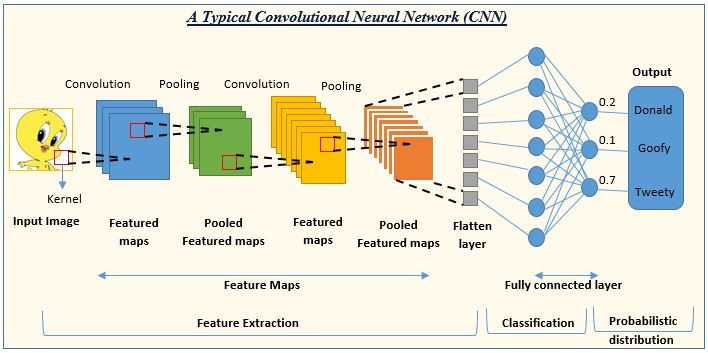
    <h5>图片2：经典CNN结构图</h5>
    </div>
</div>

<br>
卷积神经网络通常由三大部分组成：  

- **卷积层（Convolution Layer）**：提取图片中的局部特征，比如边缘或线条；
- **池化层（Pooling Layer）**：缩小图片尺寸，保留主要信息，减少计算量；
- **全连接层（Fully Connected Layer）**：综合前面提取的特征，输出具体类别。  

在本任务中，我们将根据输入图片的大小和特点，设计出一个轻量但高效的 CNN 模型，用于区分三种植物细胞。

#### 3.1 定义卷积神经网络ConvNet

接下来，让我们从公式开始，计算并补全每一层的输出大小，再设计好对应的网络结构。

**卷积层（Convolutional Layer）输出维度公式**：

  $H_{out} = \lfloor (H_{in} - K_h + 2P)/S \rfloor + 1$

  $W_{out} = \lfloor (W_{in} - K_w + 2P)/S \rfloor + 1$

  $C_{out} = K_{num}$


**池化层（Pooling Layer）输出维度公式**：

  $H_{out} = \lfloor (H_{in} - K_h + 2P)/S \rfloor + 1$

  $W_{out} = \lfloor (W_{in} - K_w + 2P)/S \rfloor + 1$

  $C_{out} = C_{in}$


🧩 **符号说明**：  

| 符号 | 含义 | 补充说明 |
|:--|:--|:--|
| $H_{in}, W_{in}$ | 输入图片的高度和宽度 | 例如一张 60×80 的图片，$H_{in}=60$, $W_{in}=80$ |
| $H_{out}, W_{out}$ | 输出特征图的高度和宽度 | 经过卷积或池化层后得到的新尺寸 |
| $K_h, K_w$ | 卷积核（或池化窗口）的高和宽 | 卷积核通常为 3×3 或 5×5；池化窗口通常为 3×3 或 2×2 |
| $K_{num}$ | 卷积核数量 | 表示生成的输出通道数 |
| $P$ | 填充（padding）大小 | 用于在图片边缘补上像素，防止图像尺寸过快缩小<br> - P=0：不填充；<br> - P=1：在每一边各加 1 个像素；<br> - **“same 填充”** 意思是“自动在边缘补像素，使输出尺寸与输入保持相同” |
| $S$ | 步长（stride） | 卷积核或池化窗口每次移动的像素数；常见取值为 1 或 2 |
| $C_{in}, C_{out}$ | 输入和输出的通道数 | 灰度图片为 1，彩色图片为 3 |


**计算并填写**：
   
我们以两层卷积、两层池化的网络为例，依次计算每层输出大小，并填写 $[输出通道数，高，宽]$。【输入图片尺寸为 `[1, 60, 80]`（灰度图通道数为 1）】

   * conv1: 1→32, kernel=3, stride=1, padding=0，输出尺寸：$[ ____, ____, ____]$

   * maxpool：2×2 → $[ ____, ____, ____ ]$

   * conv2: 32→64, kernel=3, stride=1, padding=0，输出$[ ____, ____, ____ ]$

   * maxpool：2×2 → $[ ____, ____, ____ ]$

   * 展平后维度：$_____（通道数）×_____（高）×_____（宽） = __________$，对应全连接层的输入特征数

> **小贴士**💡：<br>
> `ReLU` 激活函数让网络能够学习更复杂的特征；<br>
>  `Dropout` 在训练时随机“关闭”一部分神经元，用来减少过拟合。<br>

In [ ]:
# 动手练习5：在【请编写代码】提示下方补充代码，共三处！

# 定义卷积神经网络（ConvNet）
class ConvNet(nn.Module):
      def __init__(self):
           # 继承父类的初始化方法
          super(ConvNet, self).__init__()
          
          # ===== 第1层卷积层 =====
          # nn.Conv2d 表示二维卷积层，用于提取局部图像特征。
          self.conv1 = nn.Conv2d(
            in_channels=1,     # 输入通道：灰度图，因此是 1
            out_channels=32,   # 输出通道：卷积核数量（可调）
            kernel_size=3,     # 卷积核大小（3x3）
            stride=1,          # 滑动步长
            padding=0          # 不进行边缘填充
          )

          # ===== 池化层 =====
          self.pool = nn.MaxPool2d(
              kernel_size=2,   #池化窗口大小，这里使用 2x2 的窗口。
              stride=2         #表示每次移动的步长，设为2表示下采样一半。
          )

          # ✏️【请编写代码】补充代码，作用：定义第二层卷积层
          self.conv2 = nn.Conv2d(




              
          ) 
          
          
          # ===== Dropout 层 =====
          # Dropout 随机“关闭”部分神经元，防止网络过度依赖某一特征、减少过拟合。
          # 括号内的数代表随机丢弃的比例（0.25 表示丢掉 25% 的神经元）。
          self.dropout1 = nn.Dropout(0.25)
          self.dropout2 = nn.Dropout(0.2)

          # ===== 全连接层（Fully Connected Layer）=====
          # fc1：把卷积输出展平后连接到128个神经元
          # fc2：最终输出层
          
          # ✏️【请编写代码】补全代码，作用：使数据展平输入到全连接层，最终输出 3 个结果，对应 “0, 1, 2” 三种类别的可能性，
          self.fc1 = nn.Linear(  ,  )
         
          self.fc2 = nn.Linear(  ,  )

      def forward(self, x):
          
          # ✏️【请编写代码】补充代码，作用：搭建两层卷积+两层池化的网络结构
          x = self.conv1(x)
          x = nn.functional.relu(x)
          x = self.pool(x)
          x = self.dropput1(x)
          x = torch.flatten(x, 1)
          x = self.fc1(x)

          return x

**注意与提示**：  

- 修改输入尺寸、卷积层的 `padding` 或 `stride` 后，必须重新计算下一层的输入尺寸，否则会报“尺寸不匹配”错误。  
- 设计卷积层时，可以先画出简单的示意图再动手写代码，更容易对齐各参数。

#### 3.2 创建网络  

当所有参数确定后，我们就可以在代码中**创建网络对象（即我们的卷积神经网络）**，并把它加载到对应设备（如 CPU 或 GPU）上，为训练阶段做准备。

In [ ]:
# 创建一个我们刚刚定义好的卷积神经网络对象
net = ConvNet()

# 自动检测运行设备：如果电脑上有显卡（GPU），就用显卡；否则使用 CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 把网络放在选定的设备上，让模型在对应的硬件上进行运算
net.to(device)

# 打印当前所使用的设备
print(device)

**注意与提示**：

   * 训练与测试阶段都应使用同一个网络对象（如 `net`），以确保结果一致。

#### 3.3 小测试：用假图片走一遍网络

在正式训练前，可以先用随机生成的一张“假图片”通过网络跑一遍，检查网络是否能正常工作，输出尺寸是否正确。

In [ ]:
# 示例：前向传播测试
input_sample = torch.randn(1, 1, 60, 80)  # 一张灰度图像
output = net(input_sample)
print(output.shape)
print(f"我们的神经网络搭建好了,下一步将使用{device}进行训练")

✅ **完成标准**

- 网络运行无误，输出形状为 [1, 3]（1代表当前只输入了一张图片，3代表细胞类别数）。
- 代码能正常运行并打印提示信息：我们的神经网络搭建好了，下一步将使用cpu进行训练。


**任务小结**：在本任务中，我们成功搭建了一个基础卷积神经网络。它包含：**卷积层 + 激活函数 + 池化层**：提取并简化图像特征；**Dropout 与全连接层**：构建分类能力并增强泛化表现。通过这一环节，我们完成了从“整理数据”到“让模型具备视觉能力”的关键一步。
接下来，模型就要真正开始学习和识别植物细胞啦！

### 子任务 4：模型训练与监测

搭建好卷积神经网络后，就可以开始训练它啦！

训练的过程可以理解为：

模型反复观察图片、做出预测、对照答案并改正错误。经过多轮学习后，模型会越来越“聪明”，错误率也会不断降低。 

一次完整的训练通常包括以下步骤：
1. 从训练集中取出一批图片；
2. 让模型做出预测；
3. 计算误差（称为“损失”）；
4. 根据误差更新模型内部参数；
5. 记录训练的损失值与准确率。

这样我们就能在训练的同时监控模型的学习进展。

#### 4.1 准备训练参数  

在正式开始训练之前，我们需要先设置一些关键参数，并创建记录用变量。

**代码说明**

- 训练轮数 (num_epochs) ：控制模型要完整学习数据集的次数。数值过小模型学不够，太大可能会过拟合。对于本类任务，5～20 次通常合适。

- 学习率 (learning_rate) ：决定模型学习的快慢。数值越大，学习步子越大；太大会跳过最优解，太小则学习变慢。常用范围在 0.001 到 0.01。

- 随机种子（manual_seed）：为确保实验可重复，我们用相同的随机种子生成一致的随机结果。

In [ ]:
# 动手练习6：请在下方补全代码，为模型训练做好准备

# ✏️【请编写代码】设定训练轮数 (num_epochs) 和学习率 (learning_rate)
num_epochs =
learning_rate =


torch.manual_seed(42)      # 固定随机种子，使结果可复现

# 用于记录训练与验证过程的变量
train_losses = []          # 存放训练时每一步的损失值（用于绘图或分析）
train_counter = []         # 存放训练进度（横轴：已处理的样本数量）
val_losses = []            # 存放验证阶段的平均损失
val_counter = []           # 存放验证记录的位置（横轴刻度）

#### 4.2 定义损失函数与优化器

**代码说明**

- **损失函数（Loss Function）** 会告诉模型哪里错、错多少，它通过计算预测结果与真实标签之间的差异，来衡量模型的学习情况。这里我们使用交叉熵损失`CrossEntropyLoss`，它最常用于分类任务。

- **优化器（Optimizer）** 决定“如何改错”。当得到“错了多少”（损失）和“往哪改”（梯度）后，优化器就会根据这些信息，调整模型中每一层的参数，让下一次预测更接近正确答案。
本实验使用的是性能稳定的`Adam`优化器。

In [ ]:
# 动手练习7：✏️请编写代码，定义损失函数和优化器




#### 4.3 开始训练模型

训练模型的过程，就像“做题 — 看答案 — 改错”的循环。每看到一批图片，模型都会尝试分类，再对比真实标签判断错在哪，从而不断调整自己的判断规则。经过多轮反复，模型的预测就会越来越接近正确结果。

在本任务中：

- 每隔若干批次记录一次训练损失，方便后续分析学习曲线；  
- 每结束一轮训练（epoch）后，用验证集进行测试，检验模型是否真正学会而不是机械记忆。  

**代码说明**：
- **`optimizer.zero_grad()`**：清空上一次的梯度记录，防止旧的结果影响新的计算。  
- **`outputs = net(images)`**：让模型根据输入图片进行预测。  
- **`loss = criterion(outputs, labels)`**：计算预测与真实值之间的平均误差。  
- **`loss.backward()`**：反向传播，自动计算每个参数应如何调整。  
- **`optimizer.step()`**：执行参数更新，让模型朝着更准确的方向学习。  
- **`net.train()` / `net.eval()`**：分别切换到“训练模式”和“验证模式”，在验证阶段关闭 dropout 等随机操作。  
- **`torch.no_grad()`**：在验证时关闭梯度计算，节省显存和时间。  
- **`torch.max(outputs.data, 1)`**：取出预测概率最高的类别，用于计算准确率。  

In [ ]:
# 记录训练开始时间
train_start = time.perf_counter() 
epoch_times = []   # 用来保存每一轮的训练时间

# 多轮循环训练
for epoch in range(num_epochs):
    net.train()    # 切换到训练模式
    total_loss = 0
    epoch_t0 = time.perf_counter()

    # 用进度条条显示进度条，显示当前轮次和总轮次
    progress_bar = tqdm(train_loader, desc=f"训练轮次 {epoch+1}/{num_epochs}")
    for batch_idx, (images, labels) in enumerate(progress_bar):
        optimizer.zero_grad()               # 清空旧的梯度记录
        outputs = net(images)               # 模型预测（前向）
        loss = criterion(outputs, labels)   # 计算损失（预测误差）
        loss.backward()                     # 反向计算梯度
        optimizer.step()                    # 更新模型参数
        
        total_loss += loss.item()                    # 累加当前批次的损失
        progress_bar.set_postfix(loss=loss.item())   # 在进度条上显示当前批次的损失
        
        # 每10个批次，记录一次损失并打印进度（为画图做准备）
        if (batch_idx + 1) % 10 == 0:
            current_samples = (batch_idx + 1) * len(images) + epoch * len(train_loader.dataset)
            train_counter.append(current_samples)
            train_losses.append(loss.item())
    
    # 打印本轮平均损失
    print(f"第 {epoch+1} 轮训练结束，平均损失：{total_loss / len(train_loader):.4f}")
   
    # 验证阶段
    net.eval()
    total_val_loss = 0      # 验证集总损失
    correct = 0             # 正确预测的样本数
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = net(images)
            total_val_loss += criterion(outputs, labels).item()  # 累加验证损失
            pred = outputs.data.max(1, keepdim=True)[1]          # 取预测结果
            correct += pred.eq(labels.data.view_as(pred)).sum()  # 统计正确数
    
    avg_val_loss = total_val_loss / len(val_loader)              # 计算验证集平均损失
    val_accuracy = 100. * correct / len(val_loader.dataset)      # 计算验证集平均准确率
    
    val_losses.append(avg_val_loss)                              # 记录验证损失（每轮一个点）
    val_counter.append((epoch + 1) * len(train_loader.dataset))  # 本轮训练结束时的总样本数
    
    # 打印验证结果
    print(f"第 {epoch+1} 轮验证结束，平均验证损失：{avg_val_loss:.4f}，准确率：{val_accuracy:.1f}%\n")

    # 记录每轮训练时间
    epoch_elapsed = time.perf_counter() - epoch_t0    
    epoch_times.append(epoch_elapsed)

# 显示训练时间
train_time = time.perf_counter() - train_start    
print(f"总训练时间： {train_time:.1f}s  |  每轮平均耗时: {np.mean(epoch_times):.1f}s")

**注意与提示**：

- 如果暂时没有划分验证集，可以先跳过验证部分，只运行训练阶段。  
- 当损失值（loss）逐渐下降、准确率（accuracy）不断提升时，说明模型在有效学习。  
- 如果训练过程波动较大或收敛过慢，可以尝试减小 **学习率（learning rate）**，或调小 **批次大小（batch size）**。  

#### 4.4 绘制损失函数曲线

在 **任务六** 中，我们曾使用绘图库可视化模型训练情况。在这里，我们同样绘制损失函数曲线，直观观察训练过程中的趋势，看看模型的平均损失是否随着训练逐步下降，验证集表现是否同步改善。

通过对比训练损失（黑色）与验证损失（绿色）的变化趋势，我们可以判断模型是否真正“学进去了”，以及是否存在过拟合的情况。  

In [ ]:
# 画损失曲线 
fig = plt.figure()
plt.plot(train_counter, train_losses, color='black')
plt.scatter(val_counter, val_losses, color='green')
plt.legend(['Train Loss', 'val Loss'], loc='upper right')
plt.xlabel('Number of Training Examples Seen')
plt.ylabel('Cross-Entropy Loss')
plt.show()

✅ **完成标准**

- 训练能正常运行并顺利完成指定轮数，终端输出各轮训练与验证结果；  
- `train_loss` / `val_loss` 为有效记录，整体趋势应缓慢下降（允许轻微波动）；  
- 验证集准确率达到合理区间（非随机水平），总训练时间符合课堂预期。 


**任务小结**：这一部分，我们让模型真正进入“学习状态”，完成了从搭建网络到让模型开始学习的关键步骤。至此，我们已经完成了从 **网络构建 → 模型训练 → 性能监测** 的完整流程。接下来将进入分类任务，看看这个“学成出师”的模型在实际分类中表现如何！

## 子任务 5：模型预测与结果提交

经过多轮训练，我们的模型已经具备识别三种植物细胞的能力。现在就让它正式“上场”，对测试集中的图片进行分类预测，并生成提交文件。  

本节需要完成以下步骤：

1. **创建结果表 `submission_df`**：新建一个空的表格，用于存储每张测试图片的“图片编号”和“预测类别”。  

2. **建立文件编号映射表 `file_name_mapping`**：从测试集的列表文件中读取每一行的图片编号，在末尾加上 `.jpg`，形成一个映射表。后续可通过编号快速找到对应的图片文件名。 

3. **遍历测试加载器 `test_loader`**：每次取出一批图片送入模型，模型会输出三类细胞的预测分数。从中选概率最高的那一类，作为对应图片的预测结果。  

4. **根据批次索引获取图片编号**：使用当前批次的索引范围去 `file_name_mapping` 中找到文件名，再将文件名的 `.jpg` 后缀去掉，只保留编号部分。  

5. **整理并合并预测结果**：将每批次生成的小表（包含 `file_id` 和 `label`）依次拼接到总表中，直到所有测试图片都完成预测。  

6. **格式化并保存结果**：按要求将 0 ， 1 ， 2 三个数字标签转换为英文类别名称：  

最后，将完整结果保存为 CSV 文件，文件名为：`submission.csv`。  

In [ ]:
# 创建一个空的DataFrame，用于存储图片编号 (file_id) 和预测结果 (label)
submission_df = pd.DataFrame(columns=['file_id', 'label'])

# 假设test_dataset.label_df的第一列包含图片的文件名（不包含.jpg后缀）
file_name_mapping = {i: f"{row[0]}.jpg" for i, row in enumerate(test_dataset.label_df.itertuples(index=False))}

# 切换到推理模式
net.eval()

# 关闭梯度计算，加快推理速度
with torch.no_grad():
    for i, (images, _) in enumerate(test_loader):
        images = images.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)     # 取每张图片预测概率最高的类别
        predicted = predicted.cpu().numpy()           # 转为 numpy 数组

        # 获取当前批次的图片编号
        batch_size = images.size(0) 
        batch_indices = list(range(i * batch_size, (i + 1) * batch_size))

        # 使用file_name_mapping获取编号并去掉".jpg"后缀
        batch_file_names = [file_name_mapping[idx].replace('.jpg', '') for idx in batch_indices]

        # 将结果整理为 DataFrame
        batch_df = pd.DataFrame({'file_id': batch_file_names, 'label': predicted})

        # 将当前批次结果合并到总文件中
        submission_df = pd.concat([submission_df, batch_df], ignore_index=True)   # 现在submission_df包含了所有图片的编号和预测的label值

In [ ]:
# 动手练习8：✏️请在下方编写代码，目的：1. 将submission.df中的数字标签与英文类名对应；2. 完成结果文档的保存。
submission_df['label']=submission_df['label'].map({0:'', 1:'', 2:''})
submission_df.to_csv('', index=)

**注意与提示**：

* 确认输出文件中包含两列：file_id（图片编号）和 label（预测类别）。
* 若出现“路径不存在”错误，可新建文件夹：`os.makedirs("test_result", exist_ok=True)`。
* 可以使用 `pd.read_csv("test_result/submission.csv").shape` 查看文件行列数是否正确，或用 `submission_df['label'].value_counts()` 检查各类别数量，以确认文件内没有空值或拼写错误。

**任务小结**：本环节让模型完成了学习后的关键一步“从认识到判断”：模型读取测试图片 → 预测分类结果 → 转换为英文标签 → 保存为提交文件。至此，我们完成了整个分类流程。

### 🎉 恭喜完成！

现在，模型已经能够准确地区分三种植物细胞，而你也掌握了完整的人工智能实验流程：  

> 数据 → 模型 → 训练 → 预测 → 结果分析

从最初探索天气数据的秘密，到如今让 AI 识别显微镜下的细胞，你已经顺利走完了整场 **AI for Science** 的科学旅程！

### ✨ 最后阶段：提交你的成果吧！  

完成代码和实验后，请准备并上传 **两份 Notebook 文件** 📘：

1. **学习手册成果版 Notebook**
  - 就是你正在填写的这份，通过所有单元、保存全部输出结果。
  - 这是你的学习记录，请运行并导出后上传到玻尔平台指定位置。

2. **Teen Camp 打榜版本 Notebook**  
  - 一份只保留核心执行代码的纯净版 Notebook。
  - 包含完整训练及预测流程（生成`submission.csv`）。
  - 上传到玻尔平台，看看你的模型能排第几名吧！

无论分数高低，能够坚持完成全部任务、理解并复现整个流程，你就已经是一位真正的 **AI小科学家** 了！🌿  

保持好奇，继续探索科学与智能的边界——未来的科研灵感，也许就隐藏在你下一行代码之中 🚀

----
© 2025 周莉、陈举、王曌迪及AI4S TEEN CAMP组委会  
本教学材料仅供课堂教学与学术交流使用，未经书面许可，不得用于任何商业用途。